In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

In [ ]:
# reading the dataset
df = pd.read_csv("/content/sdss_100k_galaxy_form_burst.csv",low_memory=True,header=1)
df.head()

,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err
0,1237646587710669400,8175185722644649984,82.038679,0.847177,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,...,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,GALAXY,STARFORMING,0.067749,0.000015
1,1237646588247540577,8175186822156277760,82.138894,1.063072,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,...,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,GALAXY,STARFORMING,0.105118,0.000010
2,1237646588247540758,8175187097034184704,82.028510,1.104003,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,...,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,GALAXY,STARFORMING,0.234089,0.000030
3,1237648702973083853,332152325571373056,198.544469,-1.097059,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,...,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,GALAXY,STARFORMING,0.110825,0.000030
4,1237648702973149350,332154249716721664,198.706864,-1.046217,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,...,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,GALAXY,STARFORMING,0.136658,0.000021


In [ ]:
df.shape

(100000, 43)

In [ ]:
# data preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   objid         100000 non-null  int64  
 1   specobjid     100000 non-null  uint64 
 2   ra            100000 non-null  float64
 3   dec           100000 non-null  float64
 4   u             100000 non-null  float64
 5   g             100000 non-null  float64
 6   r             100000 non-null  float64
 7   i             100000 non-null  float64
 8   z             100000 non-null  float64
 9   modelFlux_u   100000 non-null  float64
 10  modelFlux_g   100000 non-null  float64
 11  modelFlux_r   100000 non-null  float64
 12  modelFlux_i   100000 non-null  float64
 13  modelFlux_z   100000 non-null  float64
 14  petroRad_u    100000 non-null  float64
 15  petroRad_g    100000 non-null  float64
 16  petroRad_i    100000 non-null  float64
 17  petroRad_r    100000 non-null  float64
 18  petro

In [ ]:
# Checking for missing value in each column
df.isnull().sum()

,0
objid,0
specobjid,0
ra,0
dec,0
u,0
g,0
r,0
i,0
z,0
modelFlux_u,0


In [ ]:
df.drop(columns=['objid', 'specobjid', 'ra', 'dec', 'class'], inplace=True)
df.head(5)

,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,subclass,redshift,redshift_err
0,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,7.823640,18.63581,34.98175,50.64961,...,20.07646,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,STARFORMING,0.067749,0.000015
1,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,18.703640,33.76298,50.25997,60.73625,...,19.19277,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,STARFORMING,0.105118,0.000010
2,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,3.318924,10.73388,18.80136,33.58972,...,20.00731,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,STARFORMING,0.234089,0.000030
3,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,43.044740,102.61010,150.94260,204.31610,...,18.38868,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,STARFORMING,0.110825,0.000030
4,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,0.000000,44.56038,55.77801,76.90784,...,19.09511,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,STARFORMING,0.136658,0.000021


In [ ]:
# Changing the datatype of 'subclass' from object to int

encoder = OrdinalEncoder()
df['subclass'] = encoder.fit_transform(df[['subclass']])
df.head(5)

,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,subclass,redshift,redshift_err
0,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,7.823640,18.63581,34.98175,50.64961,...,20.07646,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,1.0,0.067749,0.000015
1,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,18.703640,33.76298,50.25997,60.73625,...,19.19277,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,1.0,0.105118,0.000010
2,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,3.318924,10.73388,18.80136,33.58972,...,20.00731,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,1.0,0.234089,0.000030
3,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,43.044740,102.61010,150.94260,204.31610,...,18.38868,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,1.0,0.110825,0.000030
4,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,0.000000,44.56038,55.77801,76.90784,...,19.09511,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,1.0,0.136658,0.000021


In [ ]:
# Performing EDA
'''Descriptive statistical'''
df.describe(include='all')

,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,subclass,redshift,redshift_err
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,18.518622,17.258221,16.821739,16.362611,15.850865,30.683321,98.845058,175.621855,244.728134,307.474895,...,18.020203,17.435735,-0.603667,-0.522111,-0.309462,-0.410153,-0.740964,0.749930,0.116753,0.000179
std,105.082004,105.069066,95.035474,100.171155,114.206165,76.552859,229.479215,435.852215,619.825871,809.166087,...,100.181687,114.218604,104.870665,104.871474,94.860919,99.991654,114.005927,0.433055,0.100169,0.052189
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-47.451720,-11.935840,-42.440640,-54.385510,-144.460200,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.000000,-0.000833,0.000002
25%,18.762215,17.505868,16.898845,16.527097,16.281327,9.288132,34.462902,67.453910,91.777325,104.256550,...,18.295627,17.991602,0.299999,0.398705,0.418789,0.418656,0.381288,0.000000,0.055836,0.000008
50%,19.349715,18.072640,17.459080,17.091385,16.861105,18.195690,59.005915,103.828850,145.664550,180.086150,...,18.845780,18.563315,0.508688,0.588335,0.604795,0.604254,0.575397,1.000000,0.085850,0.000011
75%,20.079470,18.656182,17.926918,17.592650,17.453848,31.259628,99.438015,173.929225,244.944825,307.044675,...,19.586577,19.299430,0.699907,0.768804,0.773924,0.773119,0.752311,1.000000,0.135148,0.000015
max,30.960000,30.420980,31.173560,30.562360,28.553240,7915.306000,18668.400000,31755.990000,51923.480000,79058.460000,...,25.966680,27.043280,1.000000,1.000000,0.999999,1.000000,0.999998,1.000000,0.572899,16.503710


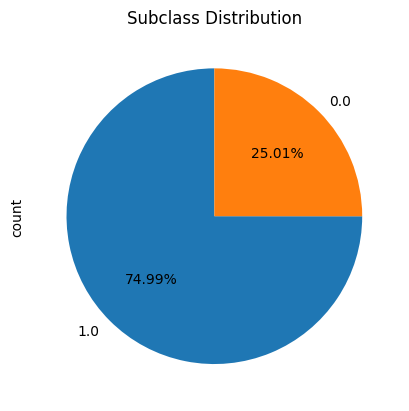

In [ ]:
'''Visual Analysis'''
# Univariate analysis

'''Pie Chart for subclass'''

sub=df['subclass'].value_counts()
sub

sub.plot(kind='pie', subplots=True, autopct='%1.2f%%', startangle=90)
plt.title("Subclass Distribution")
plt.show()

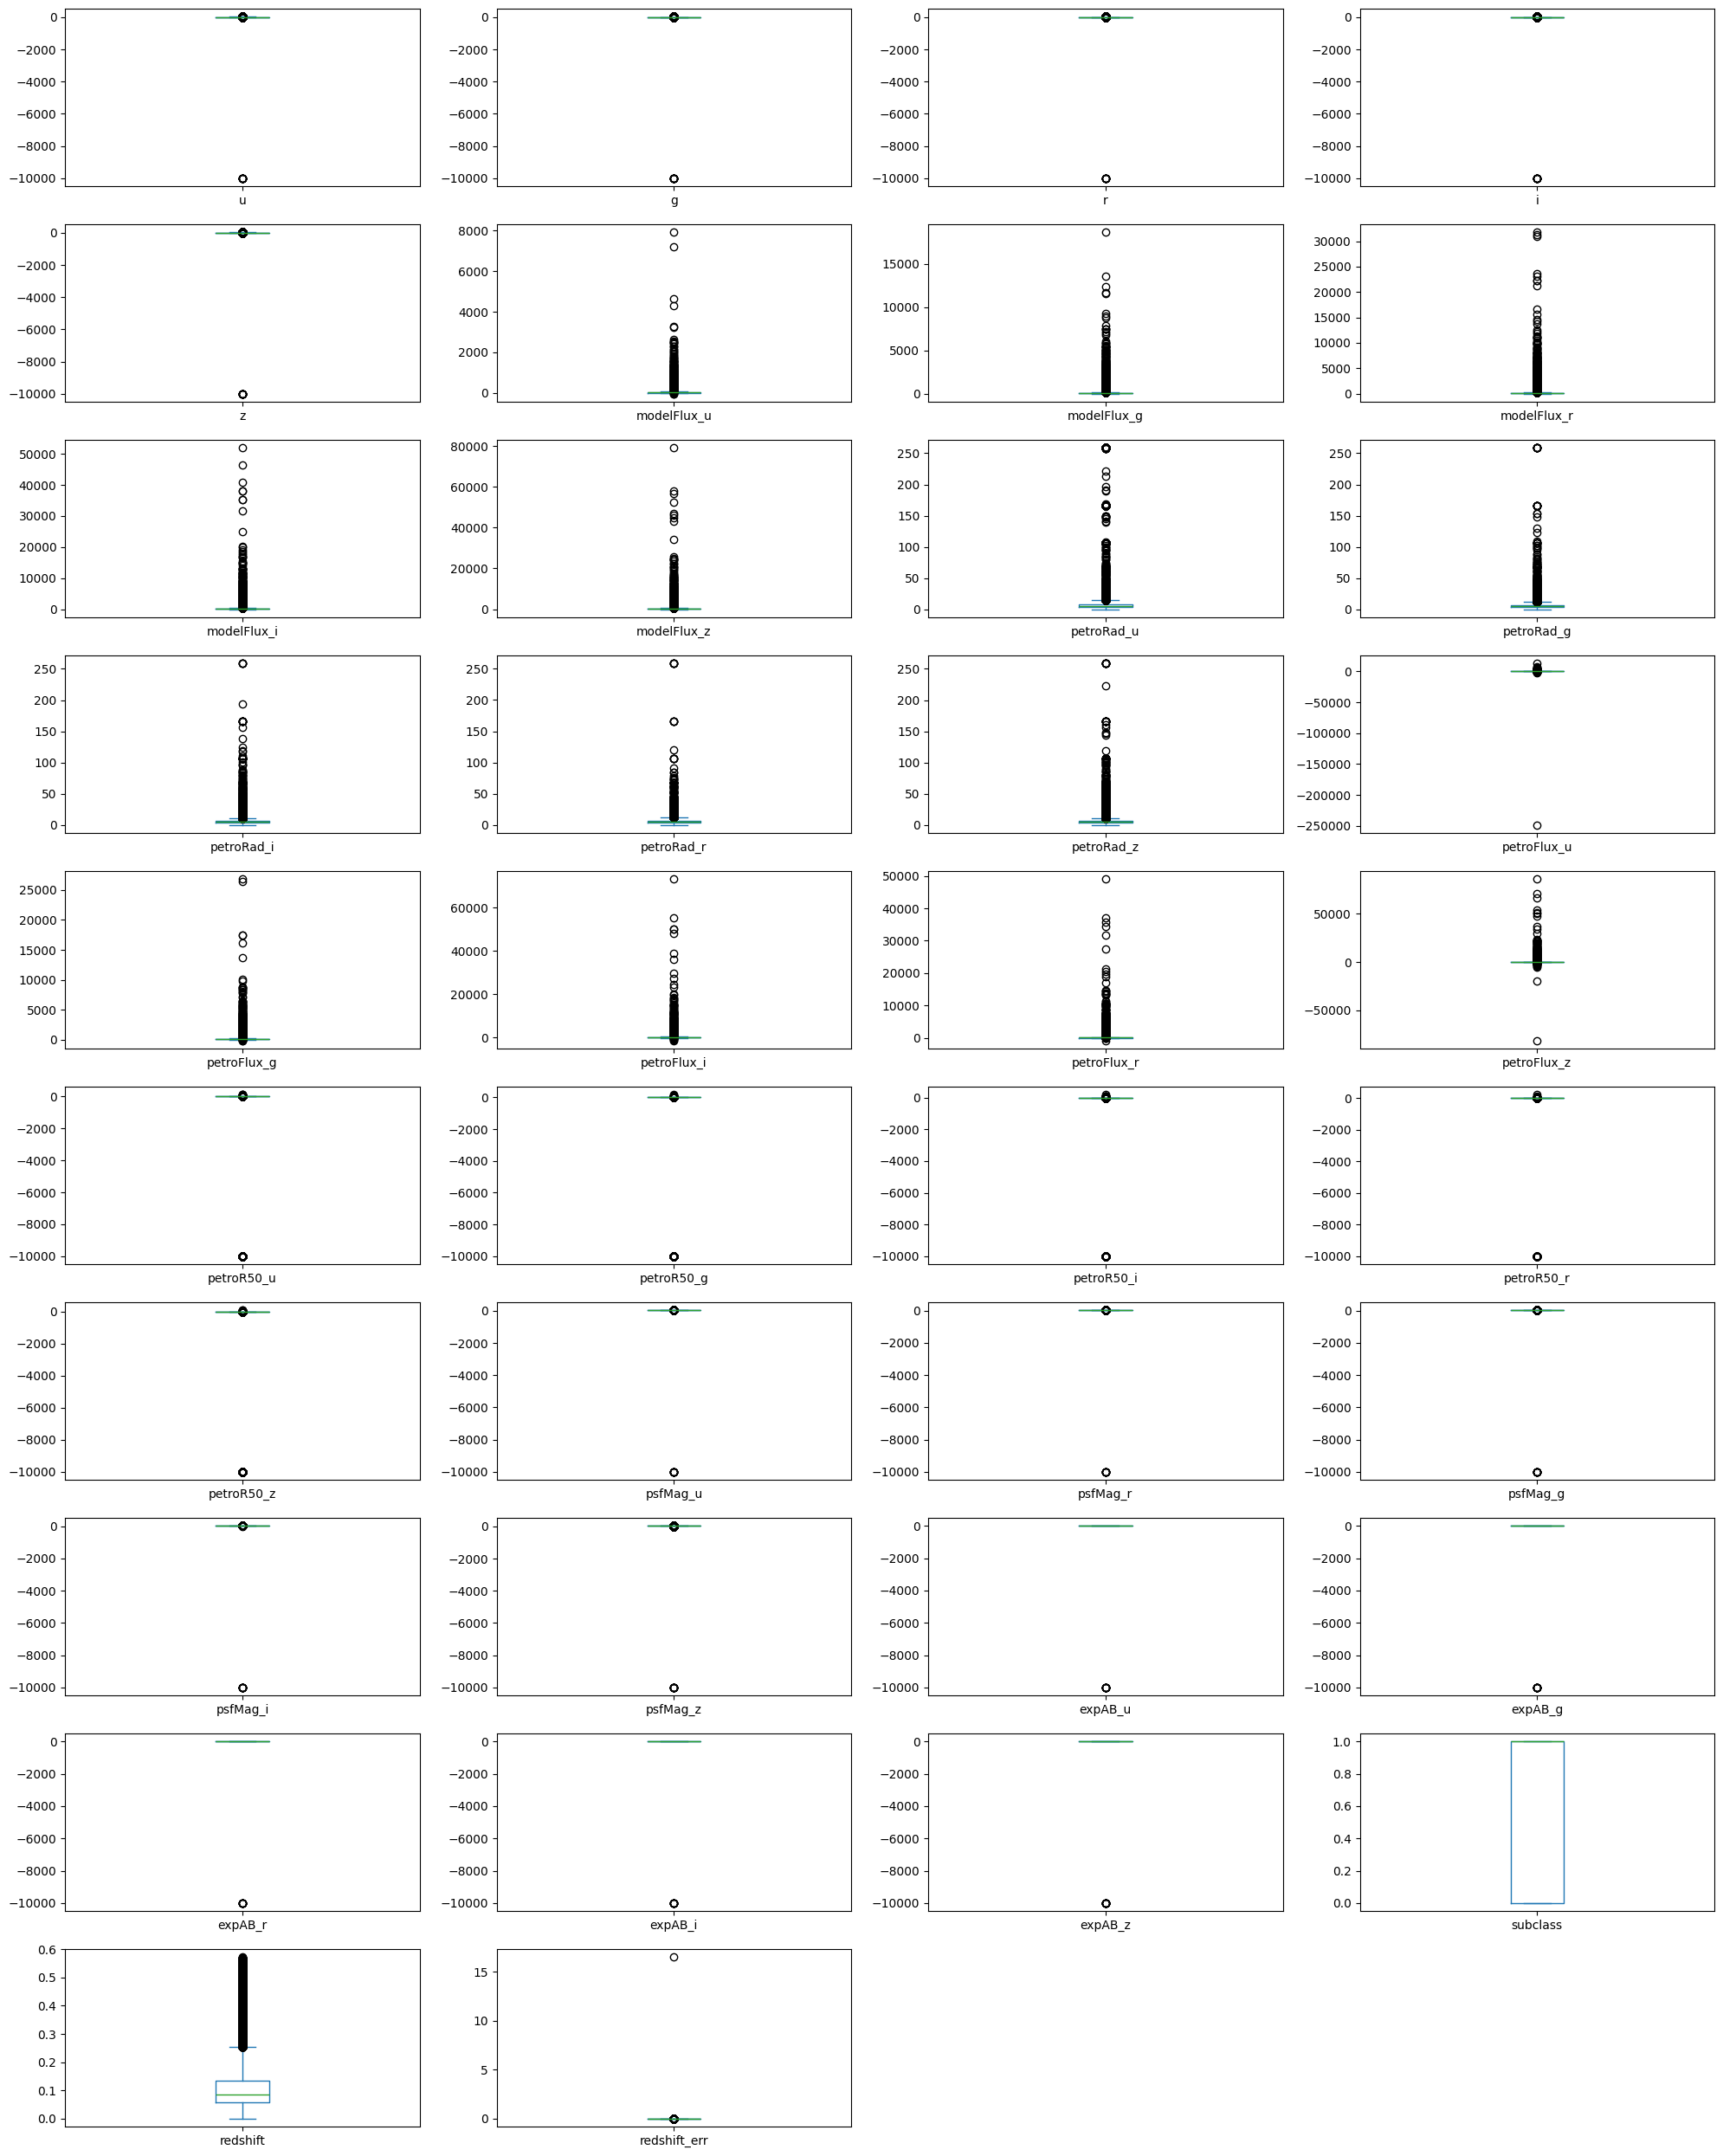

In [ ]:
# Box Plot
df.plot(kind='box', subplots=True, layout=(10, 4), figsize=(20,25))
plt.tight_layout()
plt.show()

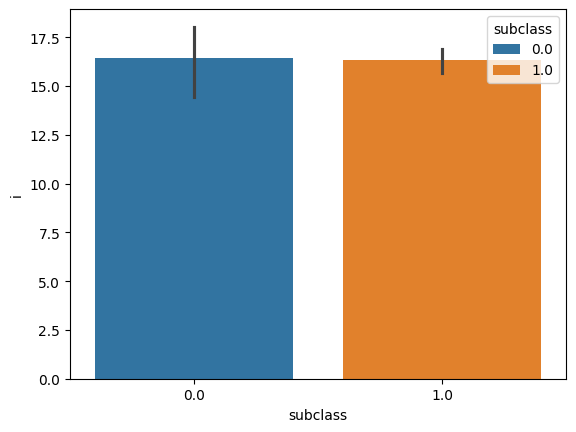

In [ ]:
# Bivariate Analysis

sns.barplot(x='subclass',y='i',data=df, hue='subclass' )
plt.show()


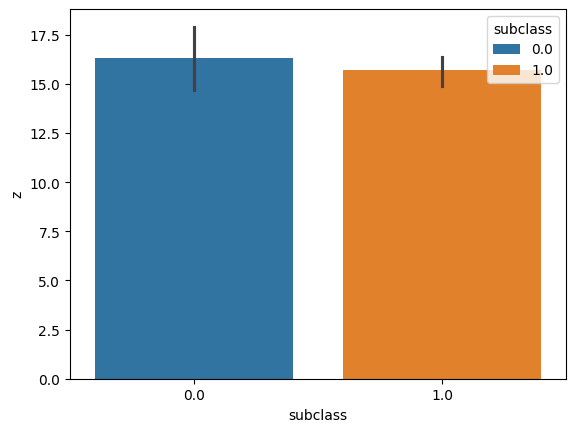

In [ ]:
sns.barplot(x='subclass',y='z',data=df, hue='subclass')
plt.show()

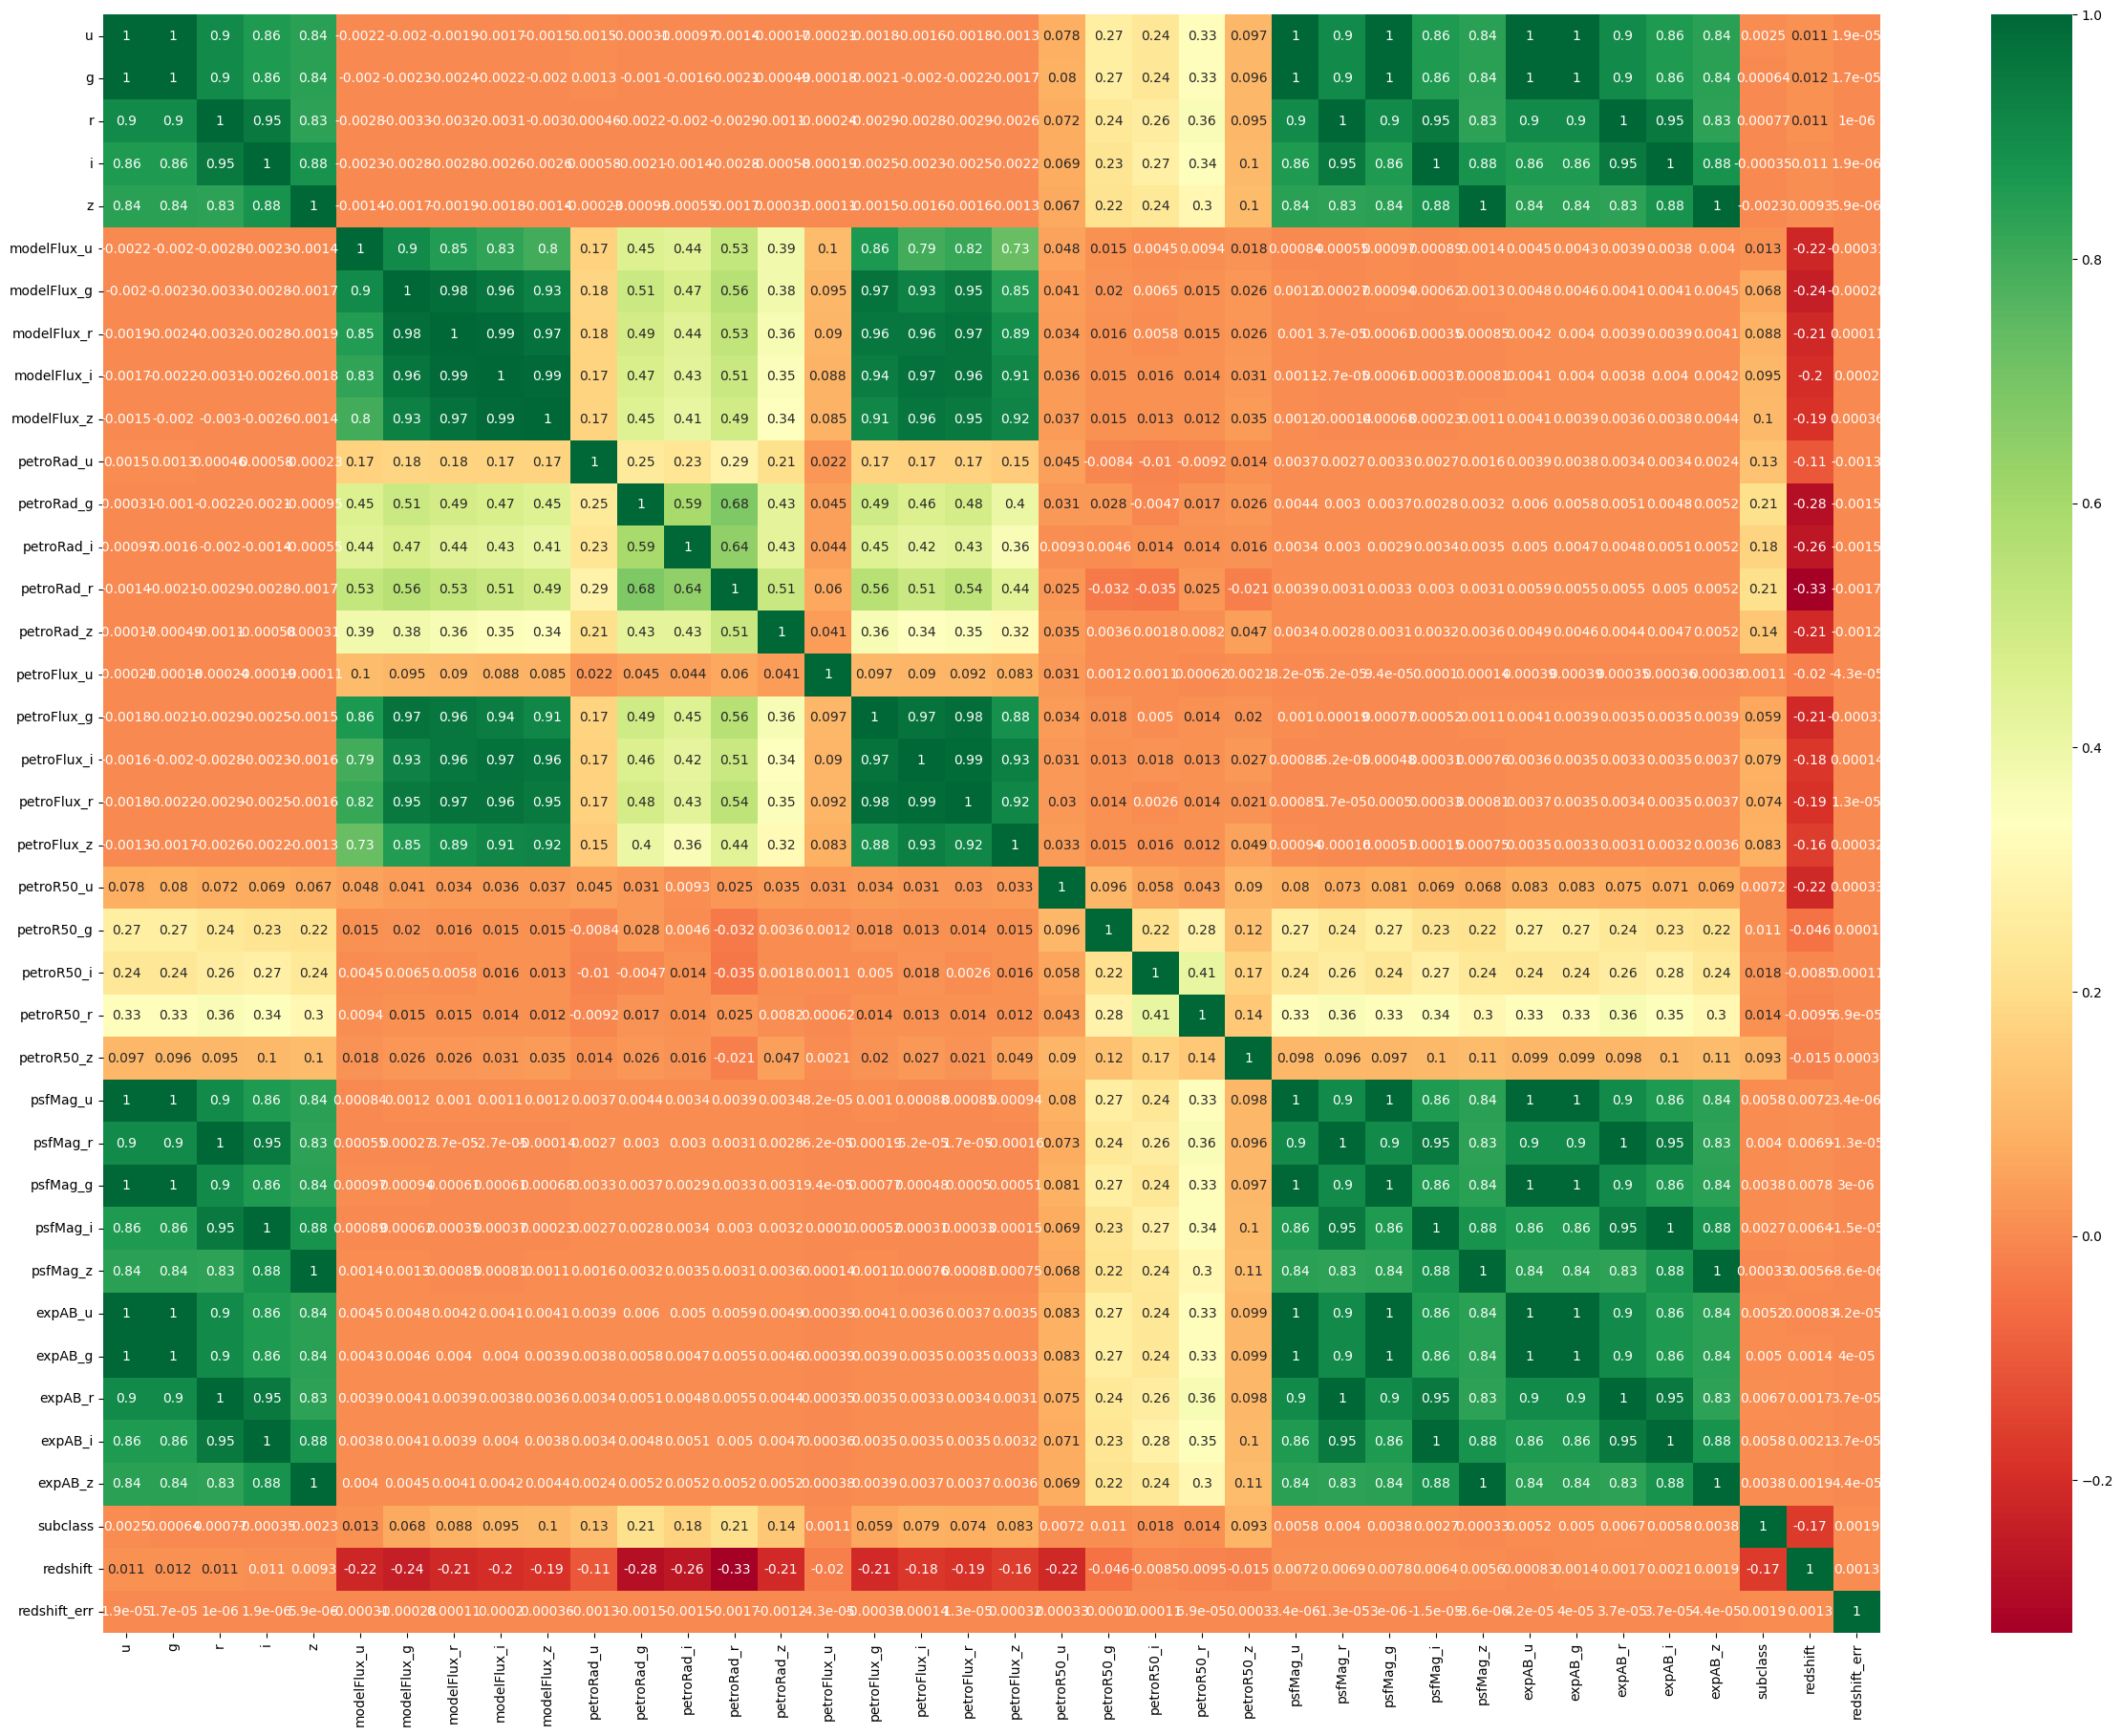

In [ ]:
# Multivariate Analysis

plt.figure(figsize=(30,22))
sns.heatmap(df.corr(), annot=True,cmap='RdYlGn')
plt.show()

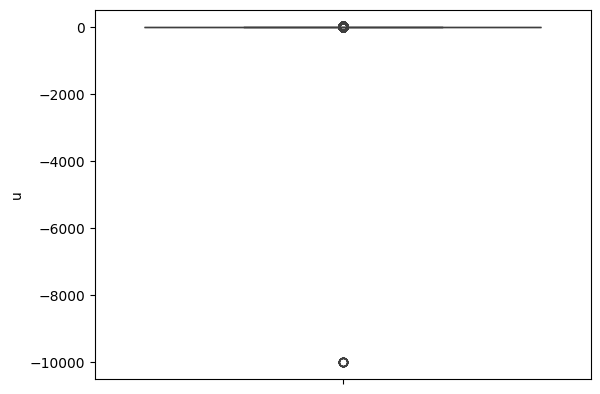

In [ ]:
# Handling the Outliers

sns.boxplot(y='u',data=df)
plt.show()

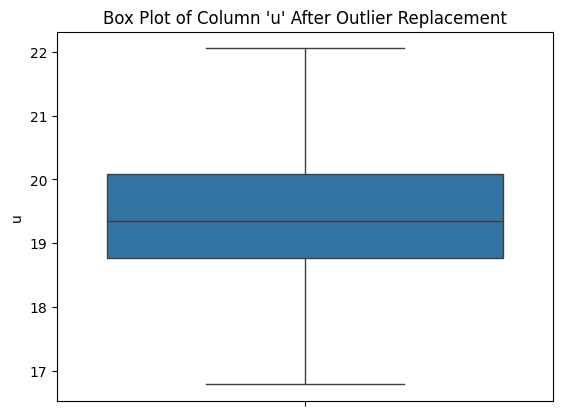

In [ ]:
# Removing outliers from 'u'

Q1 = df['u'].quantile(0.25)
Q3 = df['u'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['u'] = np.where(df['u'] > upper_bound, upper_bound, df['u'])
df['u'] = np.where(df['u'] < lower_bound, lower_bound, df['u'])

# box-plot after the outlier removal
sns.boxplot(y='u',data=df)
plt.title("Box Plot of Column 'u' After Outlier Replacement")
plt.show()

Column: u
Upper Bound for Outliers: 22.055352500000005
Lower Bound for Outliers: 16.786332499999993


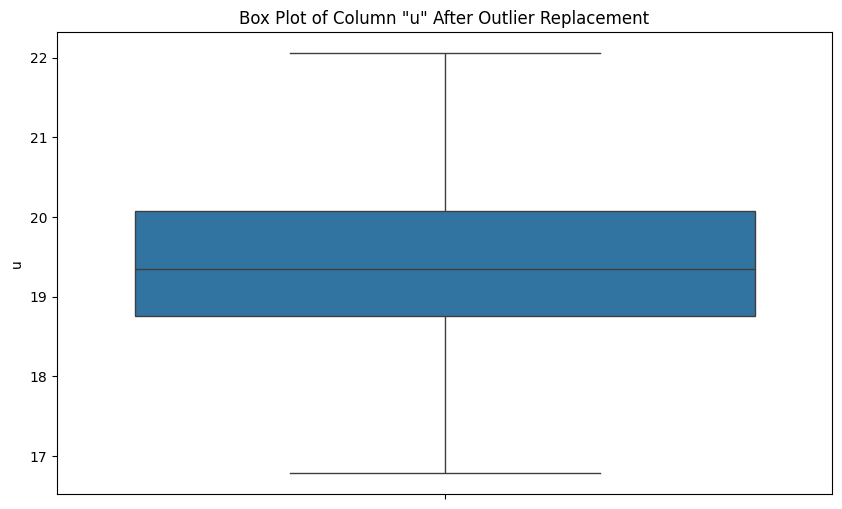












Column: g
Upper Bound for Outliers: 20.381655
Lower Bound for Outliers: 15.780395000000002


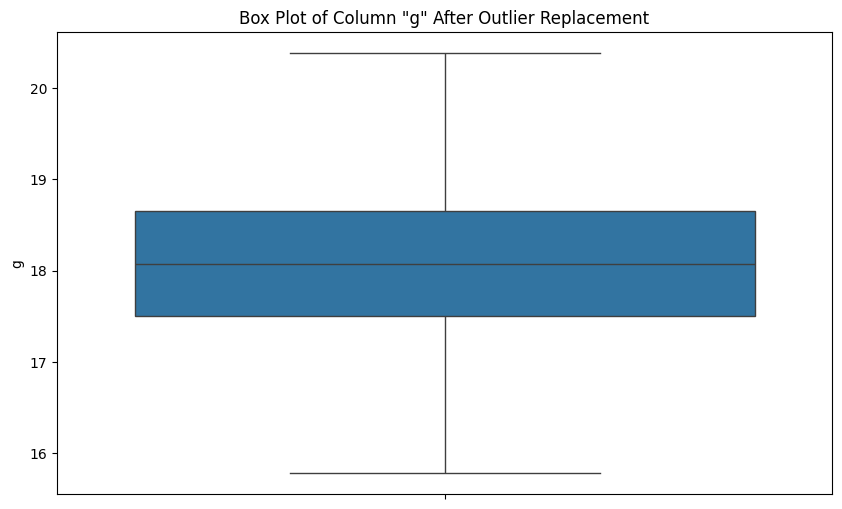












Column: r
Upper Bound for Outliers: 19.469026250000002
Lower Bound for Outliers: 15.35673625


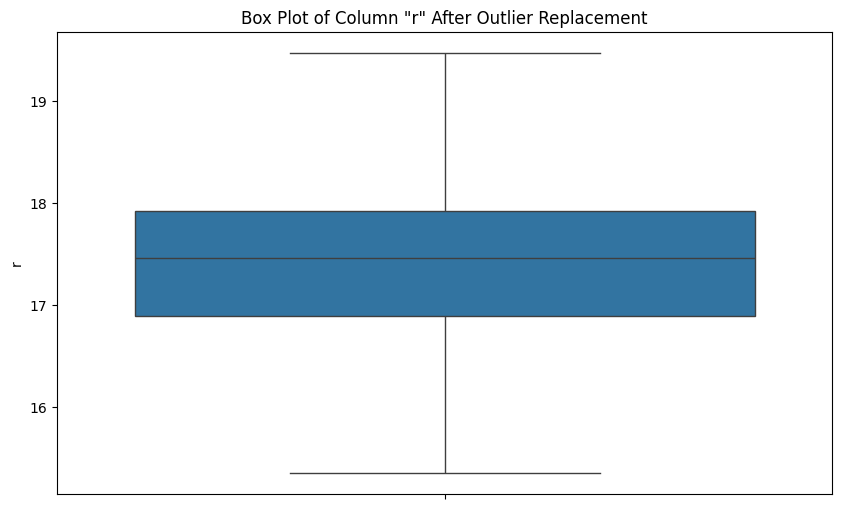












Column: i
Upper Bound for Outliers: 19.19097875
Lower Bound for Outliers: 14.928768750000001


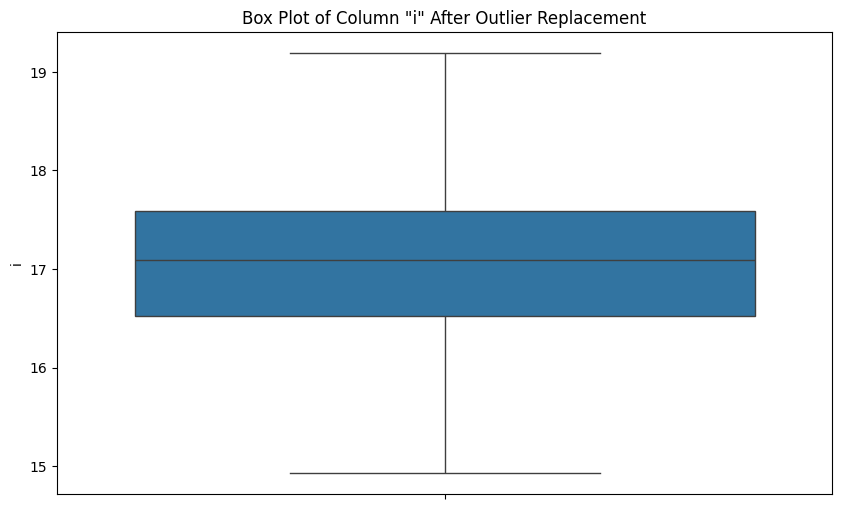












Column: z
Upper Bound for Outliers: 19.212627500000004
Lower Bound for Outliers: 14.522547499999996


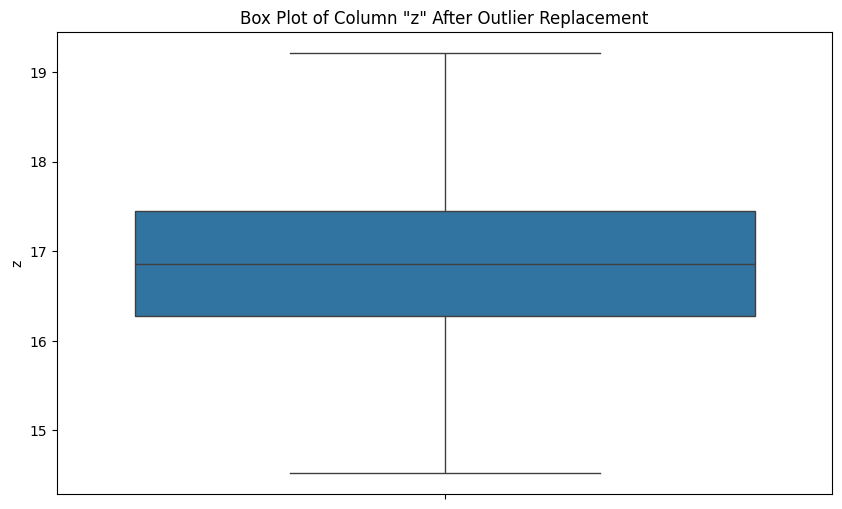












Column: modelFlux_u
Upper Bound for Outliers: 64.21687075
Lower Bound for Outliers: -23.669111249999997


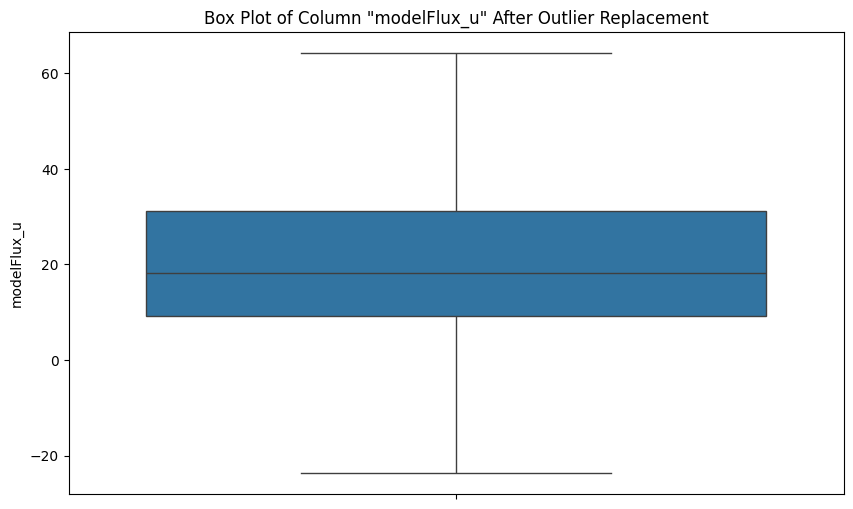












Column: modelFlux_g
Upper Bound for Outliers: 196.90068374999998
Lower Bound for Outliers: -62.99976624999999


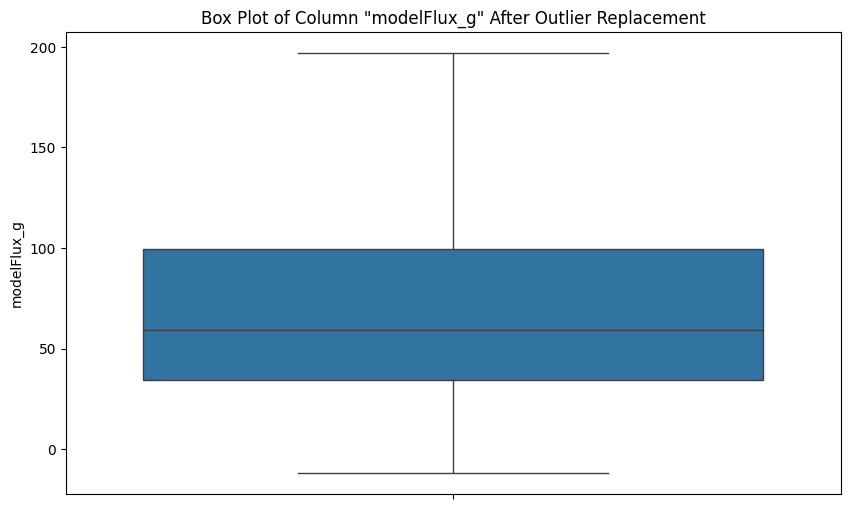












Column: modelFlux_r
Upper Bound for Outliers: 333.6421975
Lower Bound for Outliers: -92.25906250000001


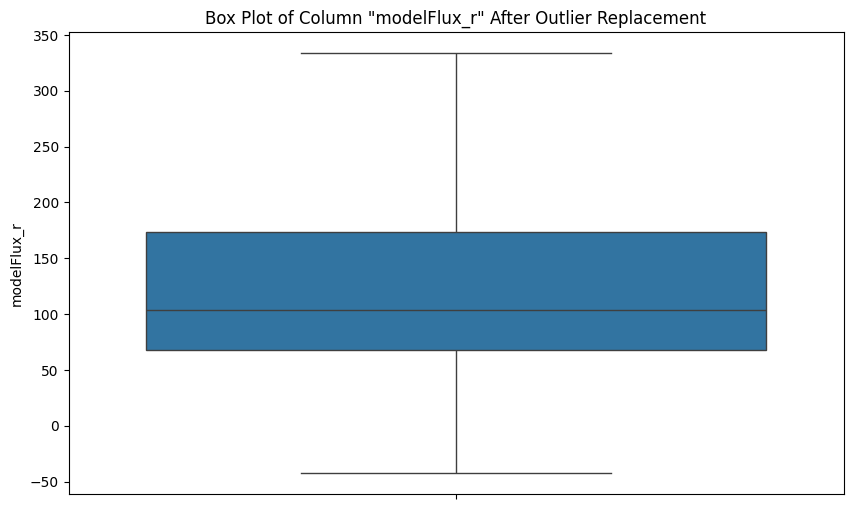












Column: modelFlux_i
Upper Bound for Outliers: 474.69607499999995
Lower Bound for Outliers: -137.97392499999995


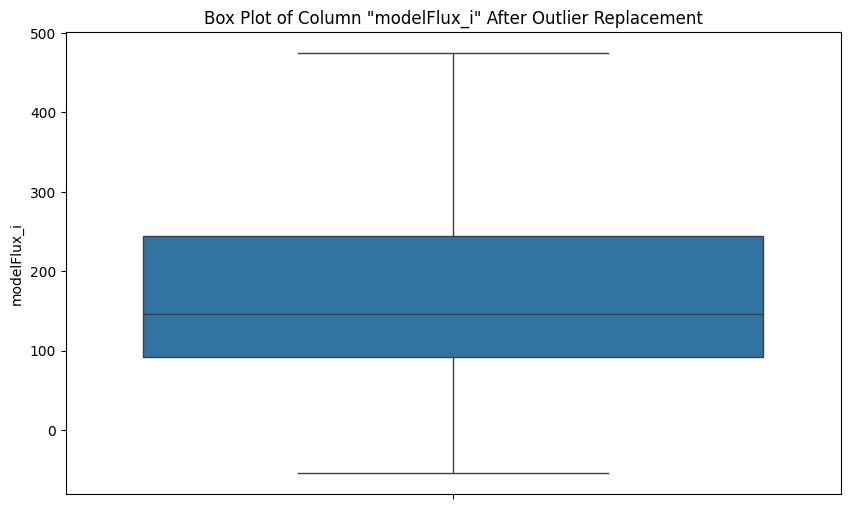












Column: modelFlux_z
Upper Bound for Outliers: 611.2268624999999
Lower Bound for Outliers: -199.92563749999994


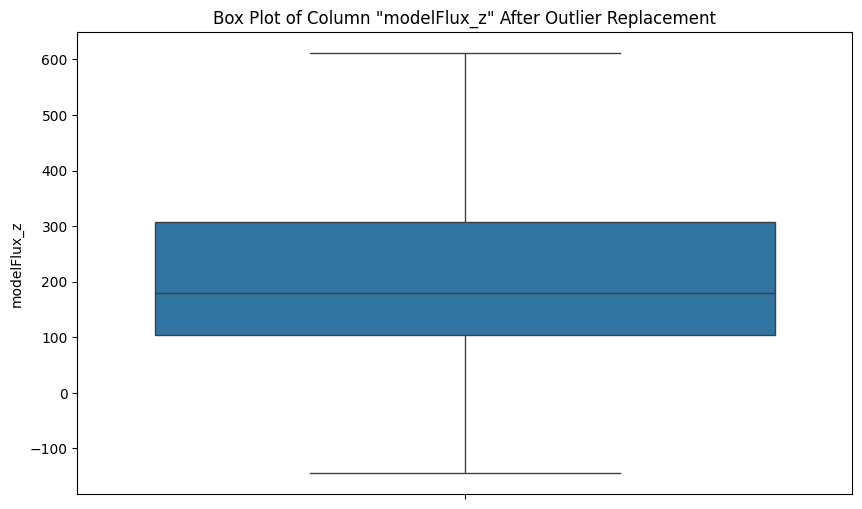












Column: petroRad_u
Upper Bound for Outliers: 15.490691875
Lower Bound for Outliers: -3.9904171249999996


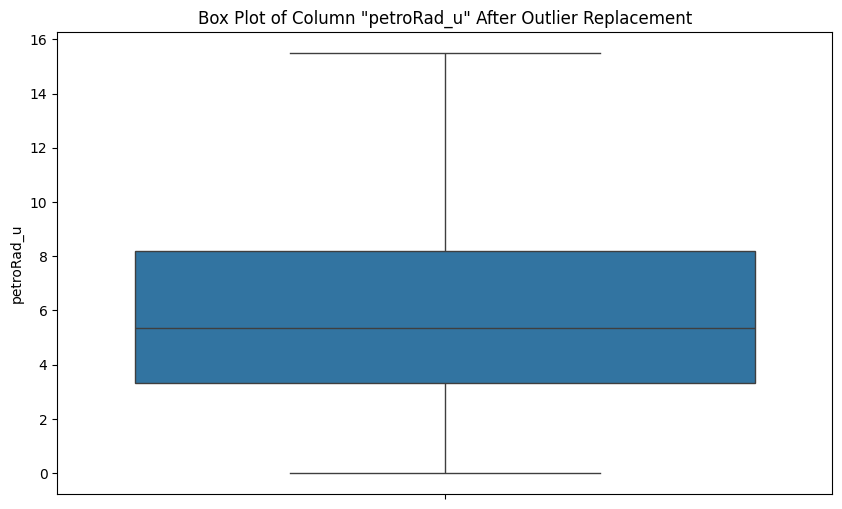












Column: petroRad_g
Upper Bound for Outliers: 12.222739500000001
Lower Bound for Outliers: -1.897624500000001


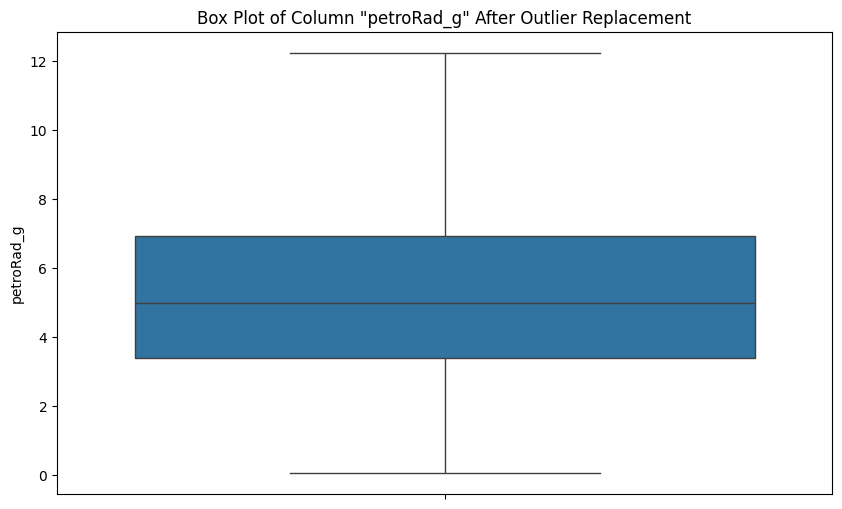












Column: petroRad_i
Upper Bound for Outliers: 11.28945375
Lower Bound for Outliers: -1.372438250000001


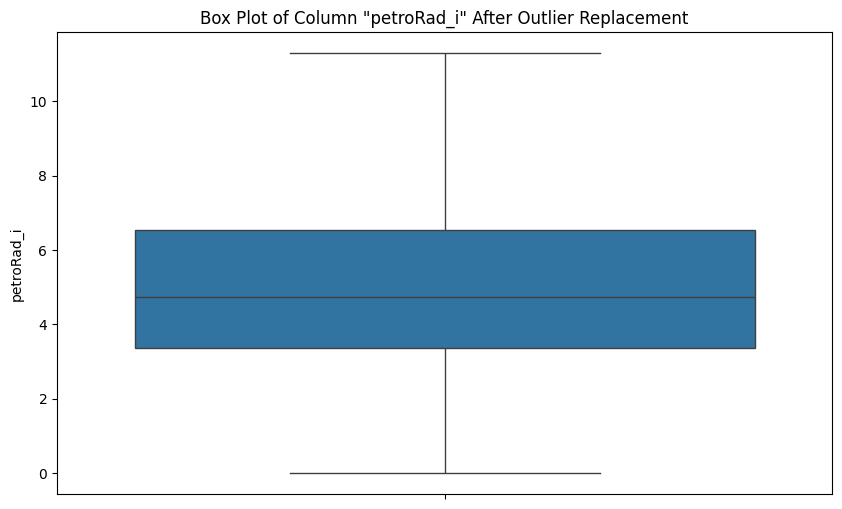












Column: petroRad_r
Upper Bound for Outliers: 11.676203000000001
Lower Bound for Outliers: -1.5261750000000012


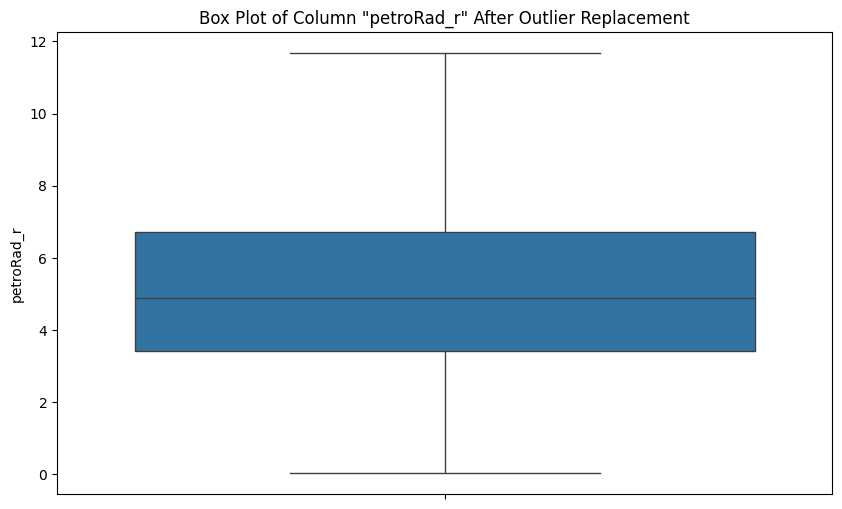












Column: petroRad_z
Upper Bound for Outliers: 11.212585874999998
Lower Bound for Outliers: -1.2890891249999994


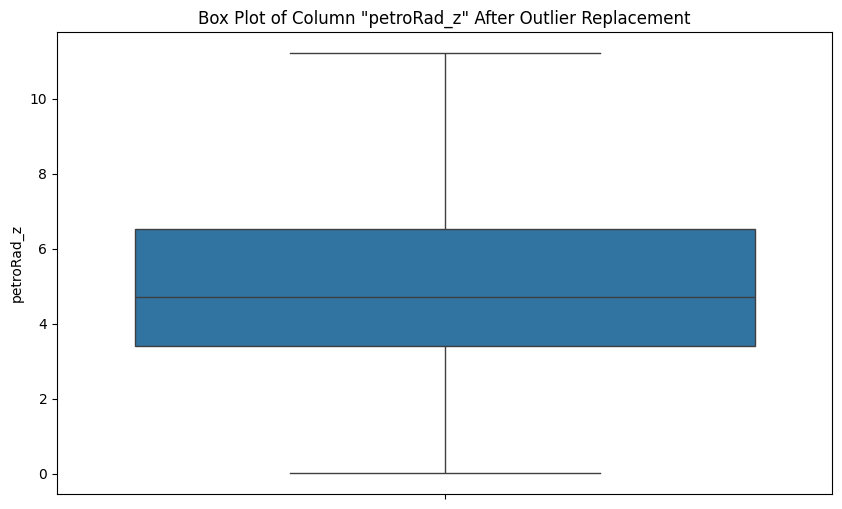












Column: petroFlux_u
Upper Bound for Outliers: 65.49768775
Lower Bound for Outliers: -24.47496625


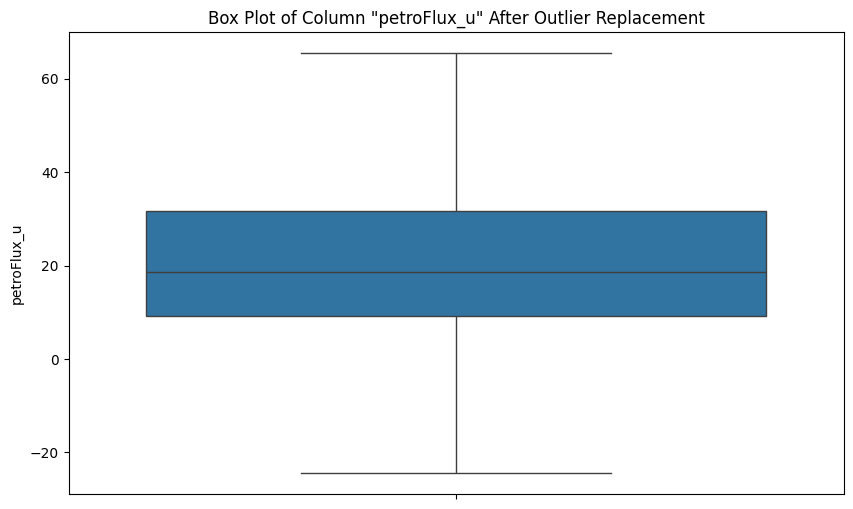












Column: petroFlux_g
Upper Bound for Outliers: 191.49622
Lower Bound for Outliers: -60.58846


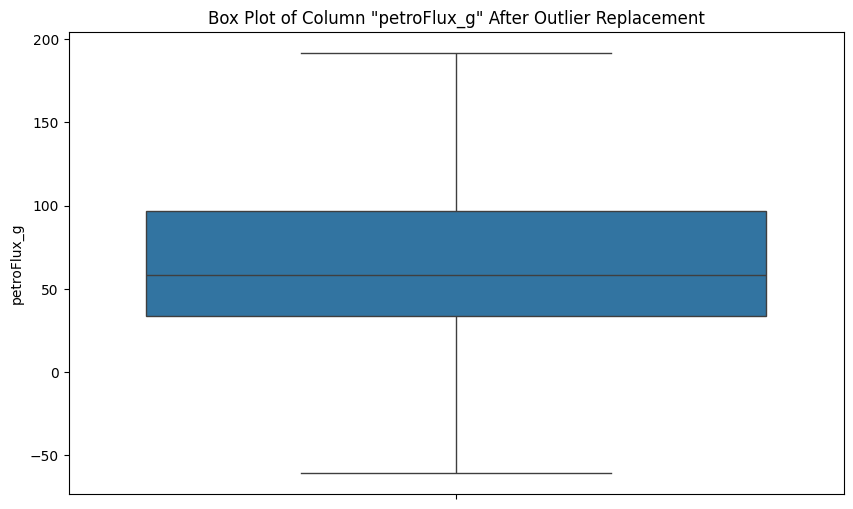












Column: petroFlux_i
Upper Bound for Outliers: 437.03996125
Lower Bound for Outliers: -122.68726874999999


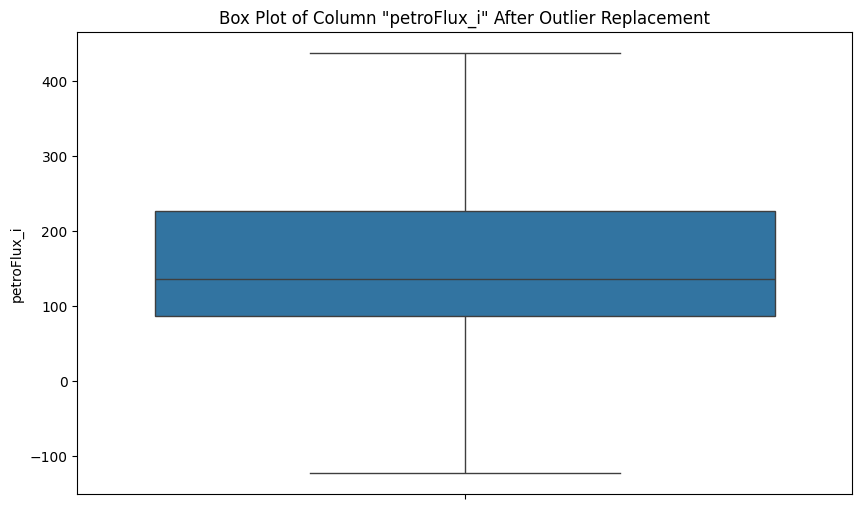












Column: petroFlux_r
Upper Bound for Outliers: 314.61387874999997
Lower Bound for Outliers: -82.84313124999997


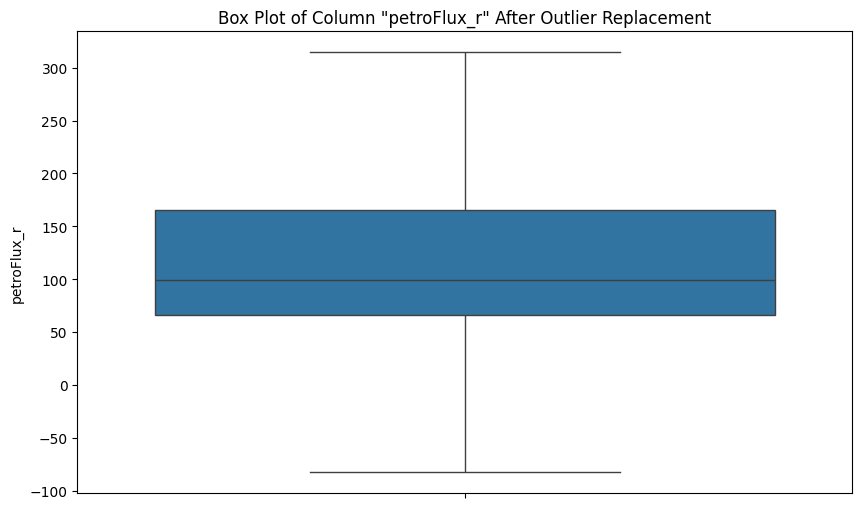












Column: petroFlux_z
Upper Bound for Outliers: 540.08705375
Lower Bound for Outliers: -178.90415625


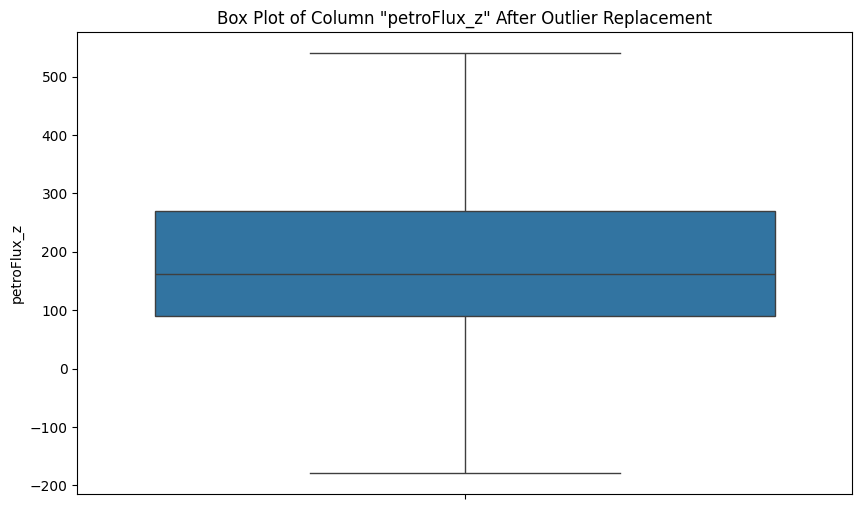












Column: petroR50_u
Upper Bound for Outliers: 6.1233509999999995
Lower Bound for Outliers: -1.093203


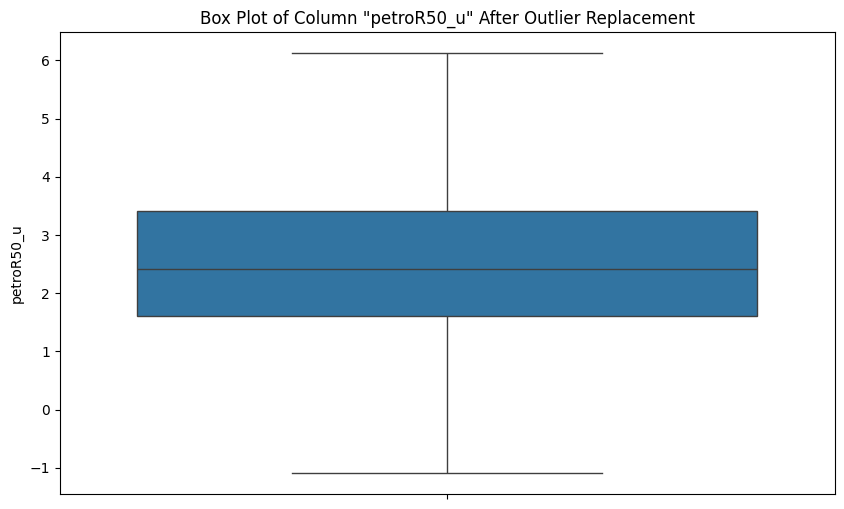












Column: petroR50_g
Upper Bound for Outliers: 5.606375875
Lower Bound for Outliers: -0.7522371250000002


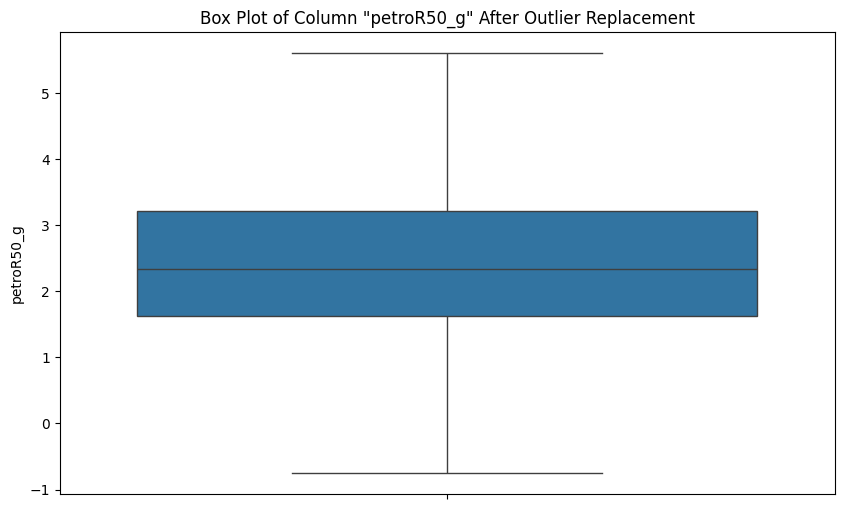












Column: petroR50_i
Upper Bound for Outliers: 5.103804499999999
Lower Bound for Outliers: -0.5851314999999992


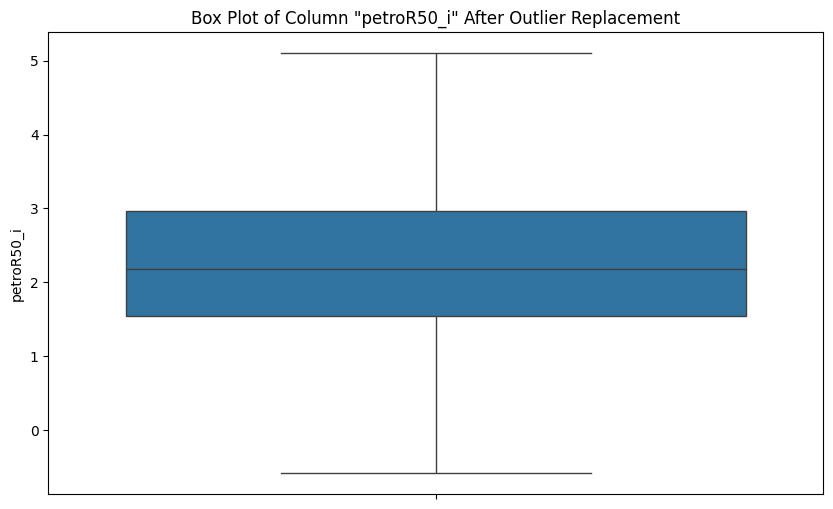












Column: petroR50_r
Upper Bound for Outliers: 5.2709107500000005
Lower Bound for Outliers: -0.6087272499999998


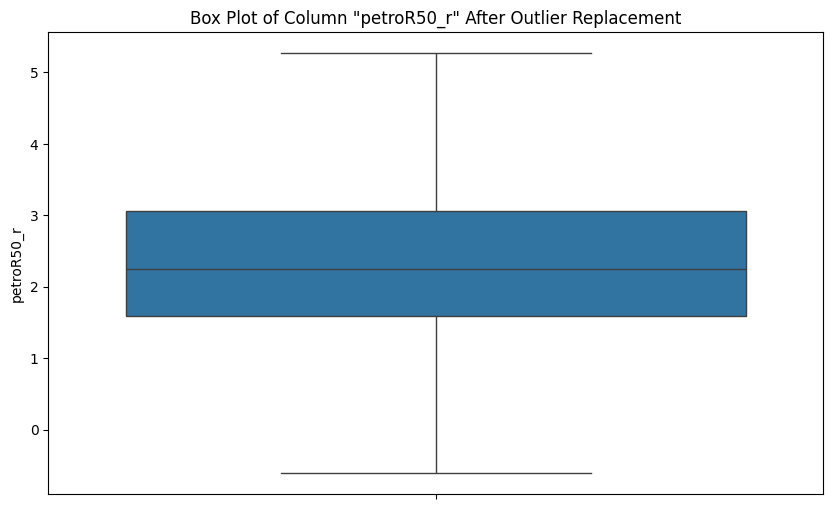












Column: petroR50_z
Upper Bound for Outliers: 4.731718125
Lower Bound for Outliers: -0.4320048750000005


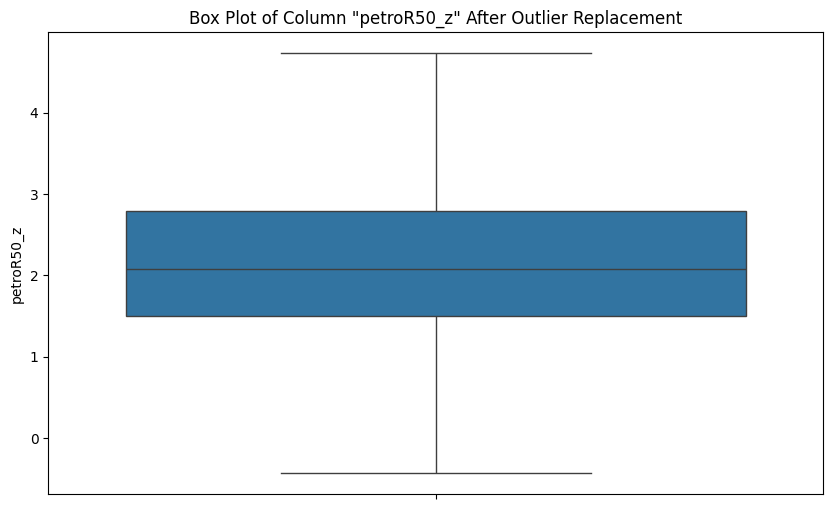












Column: psfMag_u
Upper Bound for Outliers: 23.37818375
Lower Bound for Outliers: 18.67697375


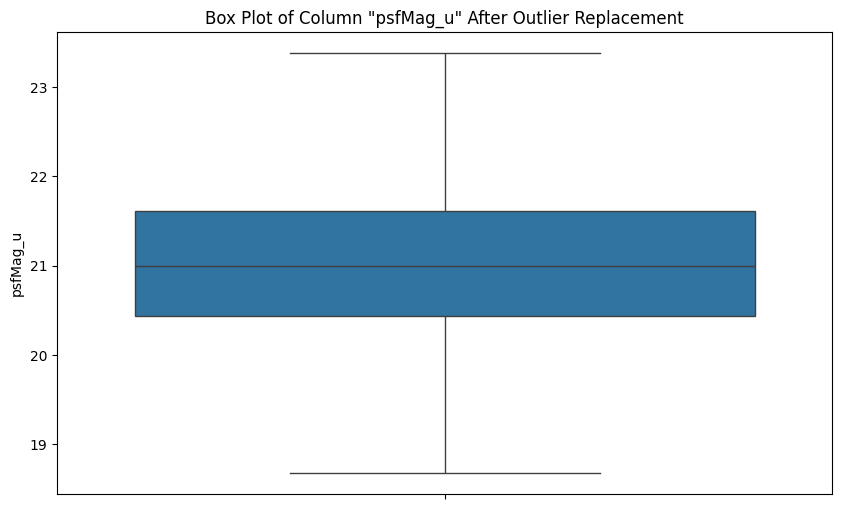












Column: psfMag_r
Upper Bound for Outliers: 21.705982499999998
Lower Bound for Outliers: 16.8410625


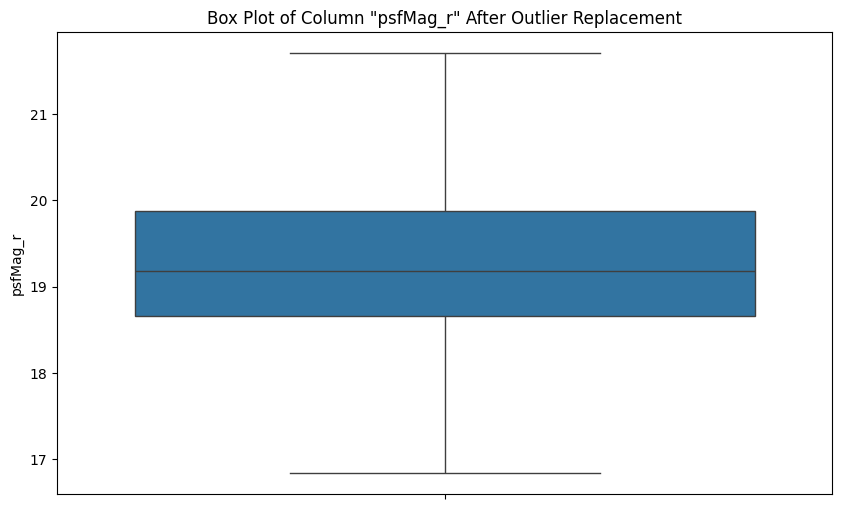












Column: psfMag_g
Upper Bound for Outliers: 22.135263749999993
Lower Bound for Outliers: 17.531293750000003


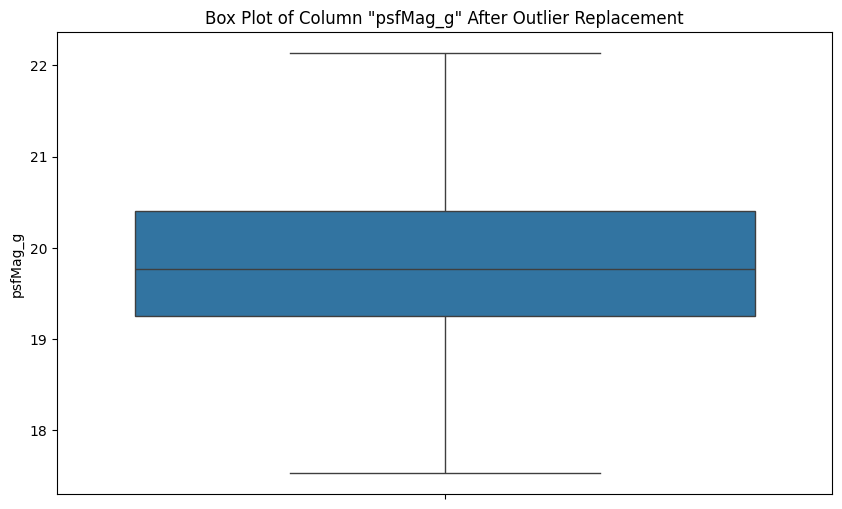












Column: psfMag_i
Upper Bound for Outliers: 21.523002499999997
Lower Bound for Outliers: 16.359202500000002


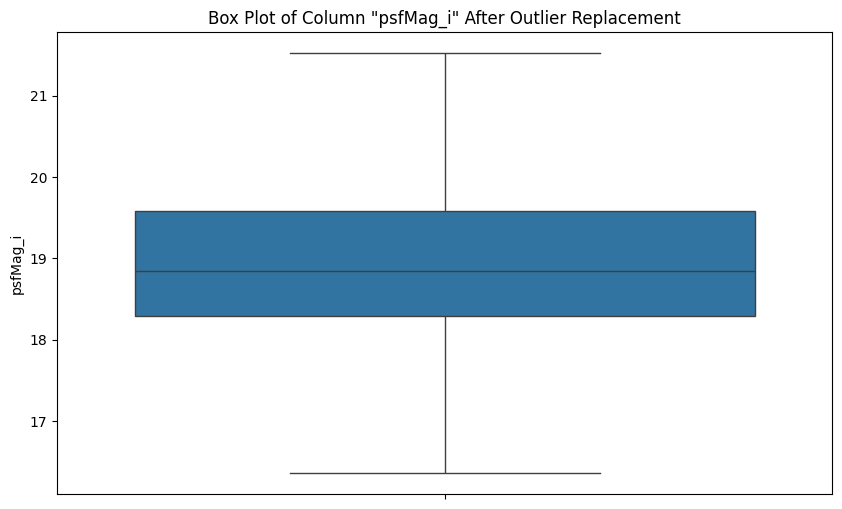












Column: psfMag_z
Upper Bound for Outliers: 21.261171250000004
Lower Bound for Outliers: 16.029861249999996


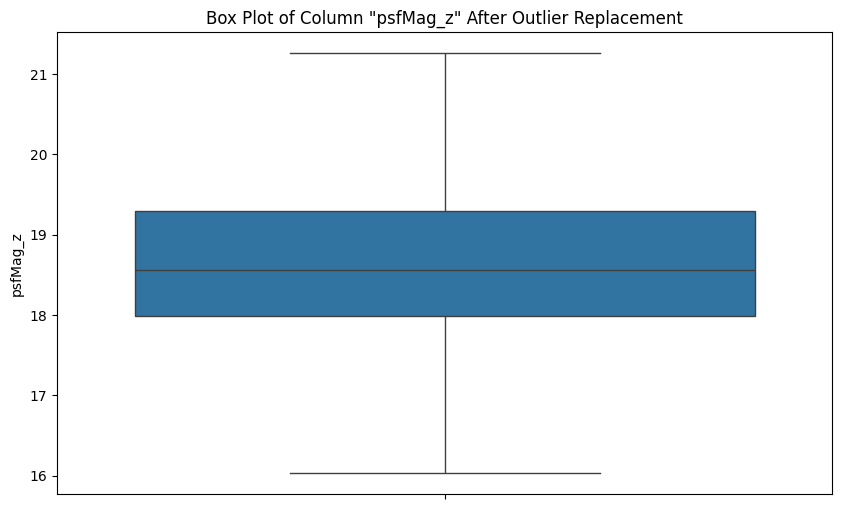












Column: expAB_u
Upper Bound for Outliers: 1.2997675249999998
Lower Bound for Outliers: -0.2998614749999998


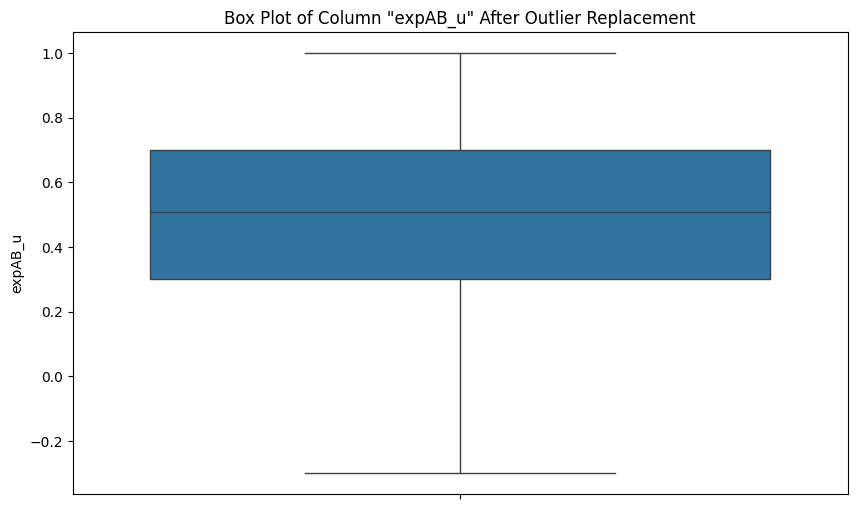












Column: expAB_g
Upper Bound for Outliers: 1.3239540625
Lower Bound for Outliers: -0.15644523749999983


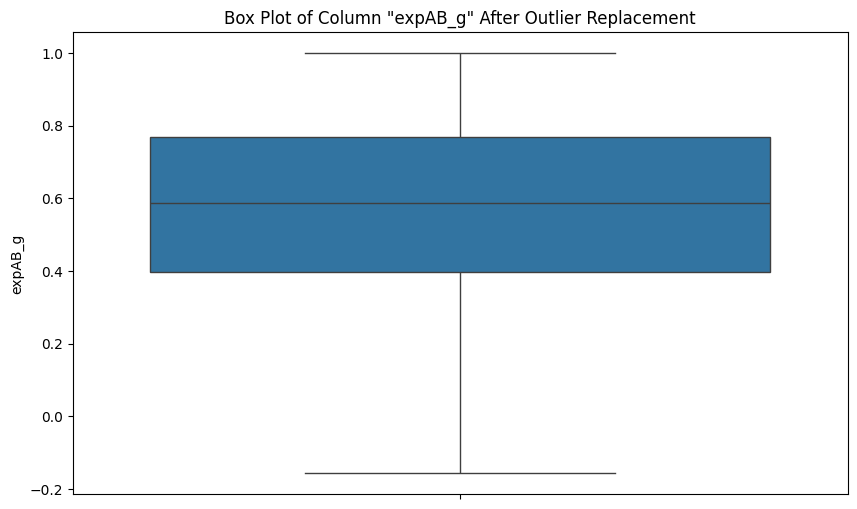












Column: expAB_r
Upper Bound for Outliers: 1.3066260124999998
Lower Bound for Outliers: -0.11391288749999995


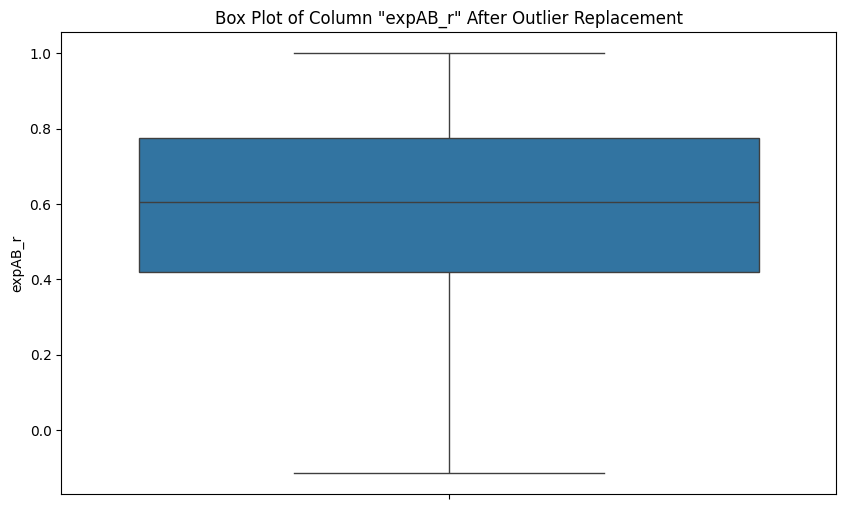












Column: expAB_i
Upper Bound for Outliers: 1.3048134
Lower Bound for Outliers: -0.1130384000000001


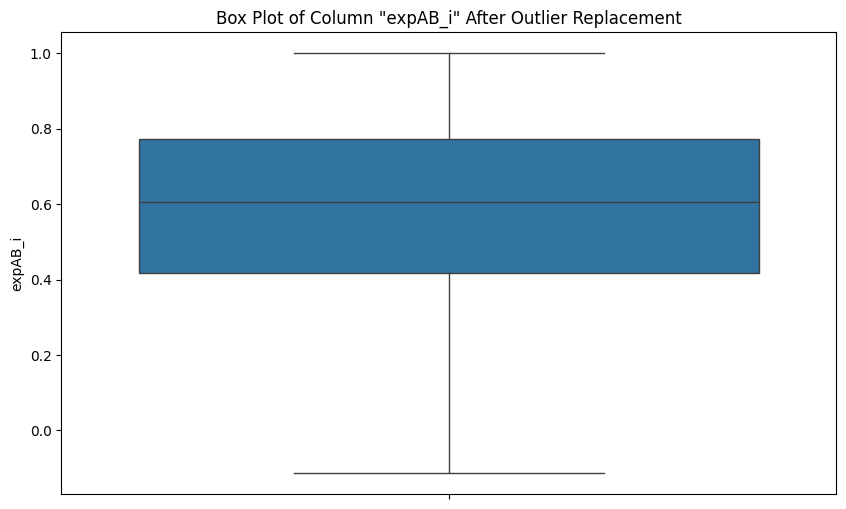












Column: expAB_z
Upper Bound for Outliers: 1.3088449624999998
Lower Bound for Outliers: -0.17524673749999997


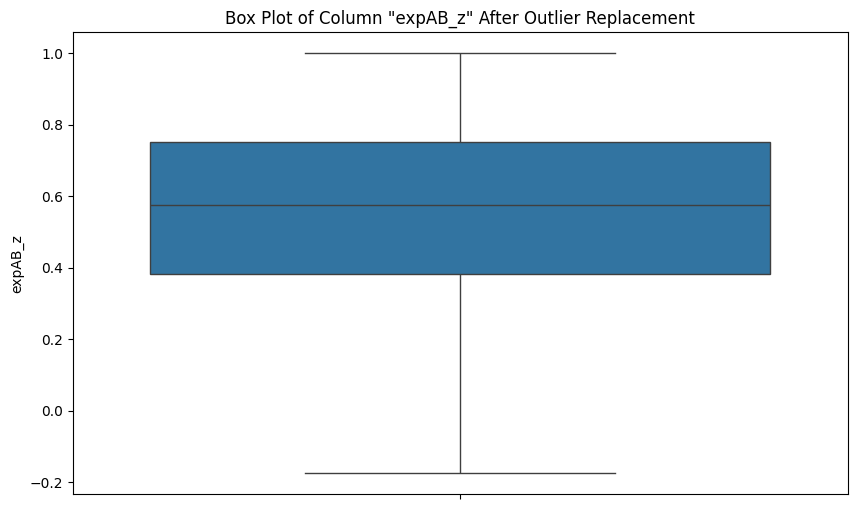












Column: redshift
Upper Bound for Outliers: 0.25411610250000005
Lower Bound for Outliers: -0.06313203750000003


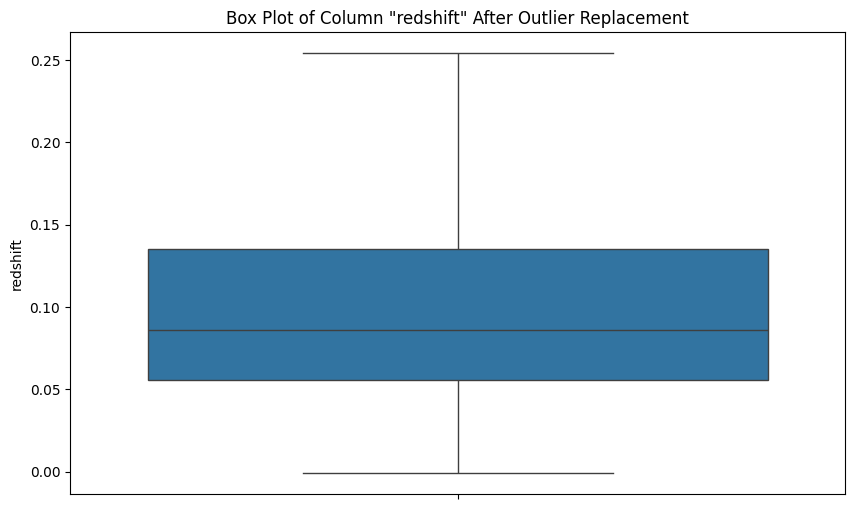












Column: redshift_err
Upper Bound for Outliers: 2.6857152750000003e-05
Lower Bound for Outliers: -3.554101250000002e-06


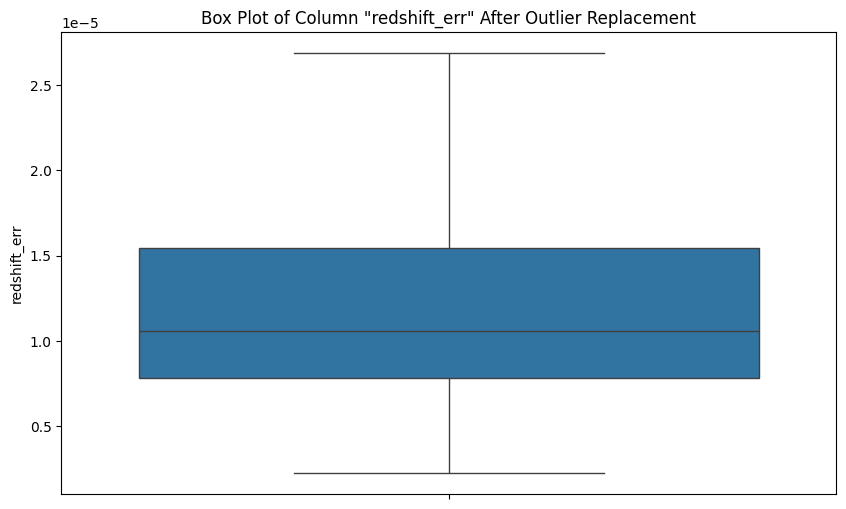

In [ ]:
# Handling outliers of other columns except the target column

target_column = 'subclass'

# Function to handle outliers for a given column

def handle_outliers(column):
  # Calculate quantiles
    quant = column.quantile(q=[0.75, 0.25])
    Q3 = quant.loc[0.75]
    Q1 = quant.loc[0.25]
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Replace outliers with the bounds
    column = np.where(column > upper_bound, upper_bound, column)
    column = np.where(column < lower_bound, lower_bound, column)

    return column, upper_bound, lower_bound


numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col != target_column]

for col in numeric_cols:
    # Handle outliers
    df[col], upper_bound, lower_bound = handle_outliers(df[col])

    # Print bounds
    print(f'Column: {col}')
    print(f'Upper Bound for Outliers: {upper_bound}')
    print(f'Lower Bound for Outliers: {lower_bound}')

    # Visualize with a box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of Column "{col}" After Outlier Replacement')
    plt.show()
    print("\n=========================================================================================================\n\n\n\n\n\n\n\n\n\n")

In [ ]:
# To verify the removal of outliers
i=0
for col in df.columns:
  if col == 'subclass':
    continue
  else:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    i+=1
    print(f"Outlier count in {col}: {outlier_mask.sum()}")

print("\n\nTotal columns checked:", i)

Outlier count in u: 0
Outlier count in g: 0
Outlier count in r: 0
Outlier count in i: 0
Outlier count in z: 0
Outlier count in modelFlux_u: 0
Outlier count in modelFlux_g: 0
Outlier count in modelFlux_r: 0
Outlier count in modelFlux_i: 0
Outlier count in modelFlux_z: 0
Outlier count in petroRad_u: 0
Outlier count in petroRad_g: 0
Outlier count in petroRad_i: 0
Outlier count in petroRad_r: 0
Outlier count in petroRad_z: 0
Outlier count in petroFlux_u: 0
Outlier count in petroFlux_g: 0
Outlier count in petroFlux_i: 0
Outlier count in petroFlux_r: 0
Outlier count in petroFlux_z: 0
Outlier count in petroR50_u: 0
Outlier count in petroR50_g: 0
Outlier count in petroR50_i: 0
Outlier count in petroR50_r: 0
Outlier count in petroR50_z: 0
Outlier count in psfMag_u: 0
Outlier count in psfMag_r: 0
Outlier count in psfMag_g: 0
Outlier count in psfMag_i: 0
Outlier count in psfMag_z: 0
Outlier count in expAB_u: 0
Outlier count in expAB_g: 0
Outlier count in expAB_r: 0
Outlier count in expAB_i: 0
Out

In [ ]:
# Dividing the dataframe into feature and target label

X=df.drop(['subclass'],axis=1)
y=df['subclass']


# Selecting best Features using Select K Best

selector = SelectKBest(score_func=f_classif,k=10)
X_selected = selector.fit_transform(X,y)
selected_features = X.columns[selector.get_support()]

print("selected features",selected_features)


selected features Index(['r', 'i', 'z', 'petroRad_g', 'petroRad_r', 'petroR50_u', 'petroR50_g',
       'petroR50_i', 'petroR50_r', 'petroR50_z'],
      dtype='object')


In [ ]:
# Balancing Value Counts using Smote

print(pd.Series(y).value_counts())
print("\n\n")

smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X,y)

print(pd.Series(y_resampled).value_counts())

subclass
1.0    74993
0.0    25007
Name: count, dtype: int64



subclass
1.0    74993
0.0    74993
Name: count, dtype: int64


In [ ]:
# Splitting data into train and test

df1 = df[['r', 'i', 'z', 'petroRad_g', 'petroRad_r', 'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z','subclass']]
x = df1[['r', 'i', 'z', 'petroRad_g', 'petroRad_r', 'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z']]
y = df1["subclass"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
# Scaling the feature variables using standardscaler method

sc=StandardScaler()
scaled_data=sc.fit_transform(x_train)

In [ ]:
'''Model Training'''

# Using Decision Tree Classifier

DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_pred=DTC.predict(x_test)
report=classification_report(y_test,y_pred)

print("Classification Report:\n",report)
print(accuracy_score(y_pred,y_test))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.57      0.57      0.57      6340
         1.0       0.85      0.85      0.85     18660

    accuracy                           0.78     25000
   macro avg       0.71      0.71      0.71     25000
weighted avg       0.78      0.78      0.78     25000

0.78124


In [ ]:
# Using Logistic Regression

lg=LogisticRegression()
log=lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("--------------------------------------")
print("Classification report:\n",classification_report(y_test,y_pred))
print(accuracy_score(y_pred,y_test))

Confusion Matrix:
 [[ 3079  3261]
 [ 1171 17489]]
--------------------------------------
Classification report:
               precision    recall  f1-score   support

         0.0       0.72      0.49      0.58      6340
         1.0       0.84      0.94      0.89     18660

    accuracy                           0.82     25000
   macro avg       0.78      0.71      0.73     25000
weighted avg       0.81      0.82      0.81     25000

0.82272


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Using Random Forest Classifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
RFtrain=RFC.predict(x_train)
RFtest=RFC.predict(x_test)

print(confusion_matrix(RFtrain,y_train))
print(confusion_matrix(RFtest,y_test))
print(classification_report(RFtrain,y_train))
print(classification_report(RFtest,y_test))

[[18574     0]
 [   93 56333]]
[[ 3699  1348]
 [ 2641 17312]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18574
         1.0       1.00      1.00      1.00     56426

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000

              precision    recall  f1-score   support

         0.0       0.58      0.73      0.65      5047
         1.0       0.93      0.87      0.90     19953

    accuracy                           0.84     25000
   macro avg       0.76      0.80      0.77     25000
weighted avg       0.86      0.84      0.85     25000



In [ ]:
# Accuracy Score of RFC

print(accuracy_score(RFtrain,y_train))
print("\n")
print(accuracy_score(RFtest,y_test))

0.99876


0.84044


In [ ]:
# Testing the model

sample = x_test.iloc[42:43]
true_label = y_test.iloc[42]
pred_label = RFC.predict(sample)

print(f"True label: {true_label}")
print(f"Predicted label: {pred_label[0]}")


True label: 1.0
Predicted label: 1.0


In [ ]:
# Saving the model

import joblib

joblib.dump(RFC, 'random_forest_model.pkl')
from google.colab import files
#files.download('random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have x_test, y_test, and the trained models: DTC, lg, RFC

models = {
    "Decision Tree": DTC,
    "Logistic Regression": lg,
    "Random Forest": RFC
}

for name, model in models.items():
    print(f"\n=== {name} ===")
    y_pred = model.predict(x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    # Feature importances for tree-based models
    if hasattr(model, "feature_importances_"):
        print("\nFeature Importances:")
        for fname, importance in zip(x_test.columns, model.feature_importances_):
            print(f"{fname}: {importance:.4f}")

NameError: name 'DTC' is not defined